In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
df = pd.read_csv("analysis/not_uploaded/parsed/SSMTIA_mobilenet_test_scores.csv")

df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3

df

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
0,abbey-glass-religion-architecture-106158.jpeg,original,0.0,0.7650,0.8130,0.7540,-0.083138,0.036292,0.015656,-0.031408,...,0.102523,0.087858,0.022356,0.033110,-0.006501,0.013927,0.025794,-0.004584,-0.063775,0.777333
1,abraham-lincoln-lincoln-memorial-washington-dc...,original,0.0,0.6670,0.9604,0.9600,-0.138892,0.016247,0.018855,0.020129,...,0.138921,0.036358,0.014826,0.039655,-0.010921,0.009203,0.002574,-0.017908,-0.019098,0.862467
2,abstract-background-backgrounds-botany-87770.jpeg,original,0.0,0.8247,0.9050,0.5920,-0.036735,-0.027765,-0.014165,-0.031239,...,0.162059,0.109030,0.022776,0.025071,-0.012066,-0.000864,0.017982,-0.014145,0.034707,0.773900
3,adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.4402,0.9087,0.5347,-0.058827,0.000727,0.032096,-0.002897,...,0.074734,0.101369,0.025553,0.020308,-0.010373,-0.003470,-0.016032,-0.027590,-0.008231,0.627867
4,adult-cute-face-female-41522.jpeg,original,0.0,0.6064,0.9653,0.7915,-0.167634,0.107369,-0.006221,-0.020402,...,0.145039,0.055826,0.034930,0.045736,-0.030916,0.005658,0.005830,-0.013185,-0.021406,0.787733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744995,wood-painting-window-cactus-6689.jpg,ratio,5.0,0.4834,0.9240,0.3967,-0.076840,0.015669,0.025125,0.003031,...,0.126020,0.042199,0.034932,0.066609,-0.032841,0.017269,0.008104,-0.013552,-0.024090,0.601367
2744996,wood-sky-forest-autumn.jpg,ratio,5.0,0.9950,0.9443,0.9805,-0.170590,0.023156,0.050436,-0.006127,...,0.081672,0.084723,0.038165,0.023761,0.018035,0.001951,-0.000805,0.013006,-0.019284,0.973267
2744997,wood-stool-wooden-wine.jpg,ratio,5.0,0.9010,0.9326,0.5317,-0.118856,0.023590,0.051719,-0.005620,...,0.159510,0.039948,0.028268,0.040899,-0.009643,-0.010283,0.016133,0.008405,0.044076,0.788433
2744998,wood-tree-brown-bark.jpg,ratio,5.0,0.4841,0.8623,0.5530,-0.045335,-0.057993,0.022533,-0.014194,...,0.124479,0.040940,0.025418,0.034139,-0.018331,0.013396,0.004648,-0.014061,-0.010070,0.633133


In [3]:
pd.DataFrame(df[df["parameter"] != "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].groupby("img").max().to_records()).sort_values("img")

,img,styles_score,technical_score,composition_score,score
0,SW_Pamela%2BWebb.jpg,0.9390,0.9730,0.8306,0.905767
1,abbey-glass-religion-architecture-106158.jpeg,0.9453,0.9730,0.9453,0.954533
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.9180,0.9940,0.9970,0.932433
3,abstract-background-backgrounds-botany-87770.jpeg,0.9360,0.9880,0.8794,0.906567
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.8867,0.9653,0.9097,0.907800
...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.9130,0.9850,0.9360,0.912433
14996,wood-sky-forest-autumn.jpg,1.0000,0.9940,1.0000,0.998000
14997,wood-stool-wooden-wine.jpg,0.9463,1.0000,0.9326,0.938467
14998,wood-tree-brown-bark.jpg,0.8910,0.9673,0.9650,0.914000


In [4]:
df[df["parameter"] == "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].sort_values("img").reset_index()

,index,img,styles_score,technical_score,composition_score,score
0,2731283,SW_Pamela%2BWebb.jpg,0.8850,0.9560,0.6367,0.825900
1,0,abbey-glass-religion-architecture-106158.jpeg,0.7650,0.8130,0.7540,0.777333
2,1,abraham-lincoln-lincoln-memorial-washington-dc...,0.6670,0.9604,0.9600,0.862467
3,2,abstract-background-backgrounds-botany-87770.jpeg,0.8247,0.9050,0.5920,0.773900
4,3,adler-bird-bird-of-prey-raptor-53587.jpeg,0.4402,0.9087,0.5347,0.627867
...,...,...,...,...,...,...
14995,2740445,wood-painting-window-cactus-6689.jpg,0.7305,0.9287,0.7905,0.816567
14996,2740446,wood-sky-forest-autumn.jpg,0.9995,0.9350,0.9976,0.977367
14997,2740447,wood-stool-wooden-wine.jpg,0.8877,0.9950,0.8013,0.894667
14998,2740448,wood-tree-brown-bark.jpg,0.5460,0.8774,0.4639,0.629100


In [5]:
# & (df["parameter"] != "pixelate") & (df["parameter"] != "impulse_noise")
scores = pd.DataFrame(df[(df["parameter"] != "original")][["img", "styles_score", "technical_score", "composition_score"]].groupby("img").max().to_records()).sort_values("img").rename(columns={"styles_score":"best_score_styles", "technical_score":"best_score_technical", "composition_score":"best_score_composition"})
scores["orig_score_styles"] = df[df["parameter"] == "original"][["img", "styles_score"]].sort_values("img").reset_index()["styles_score"]
scores["orig_score_technical"] = df[df["parameter"] == "original"][["img", "technical_score"]].sort_values("img").reset_index()["technical_score"]
scores["orig_score_composition"] = df[df["parameter"] == "original"][["img", "composition_score"]].sort_values("img").reset_index()["composition_score"]
scores["diff_styles"] = scores["orig_score_styles"] - scores["best_score_styles"]
scores["diff_technical"] = scores["orig_score_technical"] - scores["best_score_technical"]
scores["diff_composition"] = scores["orig_score_composition"] - scores["best_score_composition"]
scores

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
0,SW_Pamela%2BWebb.jpg,0.9390,0.9730,0.8306,0.8850,0.9560,0.6367,-0.0540,-0.0170,-0.1939
1,abbey-glass-religion-architecture-106158.jpeg,0.9453,0.9730,0.9453,0.7650,0.8130,0.7540,-0.1803,-0.1600,-0.1913
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.9180,0.9940,0.9970,0.6670,0.9604,0.9600,-0.2510,-0.0336,-0.0370
3,abstract-background-backgrounds-botany-87770.jpeg,0.9360,0.9880,0.8794,0.8247,0.9050,0.5920,-0.1113,-0.0830,-0.2874
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.8867,0.9653,0.9097,0.4402,0.9087,0.5347,-0.4465,-0.0566,-0.3750
...,...,...,...,...,...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.9130,0.9850,0.9360,0.7305,0.9287,0.7905,-0.1825,-0.0563,-0.1455
14996,wood-sky-forest-autumn.jpg,1.0000,0.9940,1.0000,0.9995,0.9350,0.9976,-0.0005,-0.0590,-0.0024
14997,wood-stool-wooden-wine.jpg,0.9463,1.0000,0.9326,0.8877,0.9950,0.8013,-0.0586,-0.0050,-0.1313
14998,wood-tree-brown-bark.jpg,0.8910,0.9673,0.9650,0.5460,0.8774,0.4639,-0.3450,-0.0899,-0.5011


In [6]:
scores.nlargest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
10420,pexels-photo-3094074.jpeg,0.8790,0.9683,0.9540,0.885,0.9546,0.6730,0.0060,-0.0137,-0.2810
12289,pexels-photo-396235.jpeg,0.9450,0.9995,0.9126,0.949,0.9985,0.7554,0.0040,-0.0010,-0.1572
395,man-camera-taking-photo-photographer.jpg,0.9204,0.9595,0.9690,0.922,0.8438,0.9240,0.0016,-0.1157,-0.0450
23,animal-cute-kitten-cat.jpg,1.0000,0.9850,1.0000,1.000,0.9820,1.0000,0.0000,-0.0030,0.0000
123,cherries-in-a-bowl-fruit-summer-breakfast.jpg,1.0000,0.9863,1.0000,1.000,0.8920,1.0000,0.0000,-0.0943,0.0000
143,cocoa-beans-cocoa-cacao-candy-47316.jpeg,1.0000,0.9824,1.0000,1.000,0.8570,1.0000,0.0000,-0.1254,0.0000
148,coffee-morning-sugar-design.jpg,1.0000,0.9707,1.0000,1.000,0.9536,1.0000,0.0000,-0.0171,0.0000
153,colourful-stone-smooth-usa-660550.jpeg,1.0000,0.9920,1.0000,1.000,0.9880,1.0000,0.0000,-0.0040,0.0000
154,common-foxglove-flower-digitalis-purpurea-blos...,1.0000,0.9736,1.0000,1.000,0.9470,1.0000,0.0000,-0.0266,0.0000
176,desk-laptop-notebook-working.jpg,1.0000,0.9890,1.0000,1.000,0.9155,1.0000,0.0000,-0.0735,0.0000


In [7]:
scores.nlargest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
35,architecture-beautiful-building-church-87742.jpeg,1.0000,1.0000,0.9840,0.9883,1.0000,0.9087,-0.0117,0.0,-0.0753
379,lights-abstract-blur-orange.jpg,0.9136,1.0000,0.7700,0.2568,1.0000,0.4297,-0.6568,0.0,-0.3403
1028,pexels-photo-1068115.jpeg,0.9937,1.0000,0.9985,0.9785,1.0000,0.9814,-0.0152,0.0,-0.0171
1658,pexels-photo-1174589.jpeg,0.8460,0.9995,0.9634,0.6800,0.9995,0.9410,-0.1660,0.0,-0.0224
4700,pexels-photo-1793722.jpeg,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0000
4996,pexels-photo-1852003.jpeg,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0000
5614,pexels-photo-2035871.jpeg,1.0000,0.9960,1.0000,1.0000,0.9960,1.0000,0.0000,0.0,0.0000
5640,pexels-photo-2042455.jpeg,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0000
6120,pexels-photo-2114413.jpeg,0.9060,0.9995,0.9300,0.8050,0.9995,0.8080,-0.1010,0.0,-0.1220
6166,pexels-photo-2122364.jpeg,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0000


In [8]:
scores.nlargest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
13208,pexels-photo-705880.jpeg,0.8804,0.9736,0.9717,0.8180,0.8940,0.9750,-0.0624,-0.0796,0.0033
12242,pexels-photo-375886.jpeg,0.9510,0.9700,0.9830,0.7610,0.7980,0.9844,-0.1900,-0.1720,0.0014
10153,pexels-photo-301952.jpeg,0.9430,0.9995,0.9863,0.8770,0.9897,0.9870,-0.0660,-0.0098,0.0007
23,animal-cute-kitten-cat.jpg,1.0000,0.9850,1.0000,1.0000,0.9820,1.0000,0.0000,-0.0030,0.0000
41,attractive-beautiful-brunette-cute-41539.jpeg,1.0000,0.9910,1.0000,0.9960,0.9750,1.0000,-0.0040,-0.0160,0.0000
60,beauty-cold-elegance-face-41207.jpeg,1.0000,0.9800,1.0000,0.9995,0.9326,1.0000,-0.0005,-0.0474,0.0000
76,black-and-white-fence-crime-forbidden.jpg,1.0000,0.9854,1.0000,0.9950,0.8310,1.0000,-0.0050,-0.1544,0.0000
105,camcorder-camera-digital-equipment-41550.jpeg,1.0000,0.9980,1.0000,0.9995,0.9450,1.0000,-0.0005,-0.0530,0.0000
114,car-music-audio-controls.jpg,1.0000,0.9873,1.0000,0.9990,0.9536,1.0000,-0.0010,-0.0337,0.0000
123,cherries-in-a-bowl-fruit-summer-breakfast.jpg,1.0000,0.9863,1.0000,1.0000,0.8920,1.0000,0.0000,-0.0943,0.0000


In [9]:
scores.nsmallest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
4585,pexels-photo-1767727.jpeg,0.9976,1.0000,0.9873,0.075100,0.8403,0.2235,-0.922500,-0.1597,-0.7638
5416,pexels-photo-1974203.jpeg,0.9350,0.9795,0.9717,0.082950,0.5640,0.1909,-0.852050,-0.4155,-0.7808
6901,pexels-photo-227675.jpeg,0.8496,0.9970,0.8164,0.001604,0.8438,0.1548,-0.847996,-0.1532,-0.6616
14291,pexels-photo-919069.jpeg,0.9030,0.9910,0.9175,0.058620,0.8710,0.6284,-0.844380,-0.1200,-0.2891
5991,pexels-photo-2096623.jpeg,0.9170,0.9650,0.9307,0.081360,0.8623,0.4321,-0.835640,-0.1027,-0.4986
673,pexels-photo-1021614.jpeg,0.8700,0.9640,0.8643,0.035520,0.6616,0.4412,-0.834480,-0.3024,-0.4231
13524,pexels-photo-760618.jpeg,0.8950,0.9263,0.9253,0.060940,0.6720,0.2778,-0.834060,-0.2543,-0.6475
7160,pexels-photo-2330644.jpeg,0.9155,0.9930,0.9624,0.085270,0.4023,0.9120,-0.830230,-0.5907,-0.0504
2223,pexels-photo-129731.jpeg,0.9443,0.9990,0.9260,0.114200,0.8450,0.3926,-0.830100,-0.1540,-0.5334
6320,pexels-photo-2158531.jpeg,0.8740,0.8480,0.9937,0.046970,0.5150,0.6196,-0.827030,-0.3330,-0.3741


In [10]:
scores.nsmallest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
10943,pexels-photo-3251362.jpeg,1.0000,0.9565,1.0000,0.6040,0.047900,0.93460,-0.3960,-0.908600,-0.06540
10591,pexels-photo-3163795.jpeg,0.9995,0.8710,0.9097,0.9546,0.001524,0.01252,-0.0449,-0.869476,-0.89718
95,budapest-hungary-parliament-building-73796.jpeg,0.9990,0.9470,0.9297,0.9610,0.164900,0.32130,-0.0380,-0.782100,-0.60840
11264,pexels-photo-3367418.jpeg,0.9130,0.9130,0.9890,0.4170,0.160500,0.14600,-0.4960,-0.752500,-0.84300
11419,pexels-photo-3418457.jpeg,0.8340,0.9630,0.8190,0.2223,0.218800,0.12660,-0.6117,-0.744200,-0.69240
4175,pexels-photo-1683492.jpeg,0.9395,0.9985,0.9478,0.1440,0.288000,0.22360,-0.7955,-0.710500,-0.72420
11660,pexels-photo-3530101.jpeg,1.0000,0.8965,1.0000,1.0000,0.204700,1.00000,0.0000,-0.691800,0.00000
7771,pexels-photo-2454687.jpeg,1.0000,0.9253,1.0000,0.9946,0.233800,0.99850,-0.0054,-0.691500,-0.00150
6254,pexels-photo-2137193.jpeg,1.0000,0.9420,1.0000,1.0000,0.263400,1.00000,0.0000,-0.678600,0.00000
4228,pexels-photo-169047.jpeg,0.9400,0.9316,0.9920,0.7397,0.270500,0.91360,-0.2003,-0.661100,-0.07840


In [11]:
scores.nsmallest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
9911,pexels-photo-2958096.jpeg,1.0000,0.9910,1.0000,0.9920,0.922000,0.10280,-0.0080,-0.069000,-0.89720
10591,pexels-photo-3163795.jpeg,0.9995,0.8710,0.9097,0.9546,0.001524,0.01252,-0.0449,-0.869476,-0.89718
8146,pexels-photo-2538095.jpeg,0.9893,0.9650,0.9844,0.9507,0.850000,0.08840,-0.0386,-0.115000,-0.89600
168,crossing-crossroad-street.jpg,0.7980,0.9650,0.9414,0.3160,0.659700,0.06064,-0.4820,-0.305300,-0.88076
10671,pexels-photo-318426.jpeg,0.8300,0.9490,0.9766,0.4410,0.653000,0.11080,-0.3890,-0.296000,-0.86580
13257,pexels-photo-712615.jpeg,0.8480,0.9330,0.9360,0.0747,0.539000,0.07074,-0.7733,-0.394000,-0.86526
14976,wheat-spike-wheat-field-cereals-59997.jpeg,0.9140,0.9610,0.9126,0.6920,0.878000,0.06880,-0.2220,-0.083000,-0.84380
11264,pexels-photo-3367418.jpeg,0.9130,0.9130,0.9890,0.4170,0.160500,0.14600,-0.4960,-0.752500,-0.84300
10113,pexels-photo-3009205.jpeg,0.8890,0.9710,0.9053,0.3240,0.752400,0.06506,-0.5650,-0.218600,-0.84024
8757,pexels-photo-2693884.jpeg,0.7935,0.9873,0.9834,0.4560,0.947300,0.15730,-0.3375,-0.040000,-0.82610


In [12]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_styles").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["styles_score"] == row.best_score_styles)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
838959,pexels-photo-1767727.jpeg,temperature,2000.0,0.9976,1.0000,0.8516,-0.167181,0.080872,0.101506,-0.056223,...,0.050455,0.008867,0.002809,0.101007,0.011315,0.089042,0.081268,0.047821,-0.133721,0.949733
991265,pexels-photo-1974203.jpeg,impulse_noise,5.0,0.9350,0.9795,0.9414,0.051529,-0.044527,0.054628,-0.004119,...,0.213205,0.045566,0.024120,0.006822,-0.026303,0.003659,0.002577,-0.019468,-0.064420,0.951967
1264425,pexels-photo-227675.jpeg,temperature,2000.0,0.8496,0.9490,0.7456,-0.067741,0.030245,0.044397,-0.020305,...,0.145734,0.070693,0.029081,0.063146,0.003912,0.010097,0.008792,-0.009303,-0.077078,0.848067
2614340,pexels-photo-919069.jpeg,temperature,20000.0,0.9030,0.9910,0.7935,-0.107766,0.065743,0.022319,-0.015046,...,0.156398,0.024098,0.012652,0.057967,-0.038329,-0.001172,0.015898,-0.004373,-0.035577,0.895833
1096340,pexels-photo-2096623.jpeg,gaussian_noise,4.0,0.9170,0.9155,0.8790,-0.137961,0.093126,0.041690,0.027337,...,0.181932,0.038299,0.024140,0.031838,-0.004228,-0.006177,-0.002138,-0.040346,-0.026521,0.903833
122022,pexels-photo-1021614.jpeg,impulse_noise,5.0,0.8700,0.9250,0.7046,-0.070426,0.017955,0.046354,-0.007828,...,0.125949,0.049792,0.034313,0.027974,-0.013309,0.032604,0.041983,-0.018947,-0.015794,0.833200
2473098,pexels-photo-760618.jpeg,motion_blur,1.0,0.8950,0.8613,0.8867,-0.130895,0.005460,0.057786,0.023105,...,0.095815,0.053973,0.055351,0.036435,0.002816,-0.010849,0.012810,-0.061579,0.020106,0.881000
1311134,pexels-photo-2330644.jpeg,motion_blur,5.0,0.9155,0.9920,0.9624,-0.080456,0.019413,-0.042713,0.050299,...,0.223102,0.127051,0.040229,0.008424,-0.032147,0.033624,0.016302,-0.005793,-0.173763,0.956633
405147,pexels-photo-129731.jpeg,defocus_blur,4.0,0.9443,0.9990,0.2740,0.015713,-0.042541,0.078440,-0.035044,...,0.085411,0.076109,0.095925,0.081807,-0.015794,0.001370,0.027313,-0.000691,-0.023749,0.739100
1155544,pexels-photo-2158531.jpeg,motion_blur,3.0,0.8740,0.3894,0.7330,-0.141744,-0.089968,0.077221,-0.044059,...,0.074695,0.175812,0.078105,-0.018859,-0.009368,-0.009457,0.000942,0.034124,-0.177572,0.665467


In [13]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_technical").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["technical_score"] == row.best_score_technical)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
2001017,pexels-photo-3251362.jpeg,temperature,2000.00,1.00000,0.9565,1.00000,-0.294071,0.076276,0.055772,-0.029013,...,0.087966,0.058527,0.011288,0.120782,0.019201,-0.017195,0.010199,-0.015859,-0.032890,0.985500
1935265,pexels-photo-3163795.jpeg,contrast,-1.00,0.02286,0.8710,0.02565,-0.078788,-0.028556,0.026568,-0.012789,...,0.078365,0.054638,0.043460,0.036790,-0.005802,0.004451,0.030703,-0.012325,0.048671,0.306503
16294,budapest-hungary-parliament-building-73796.jpeg,defocus_blur,5.00,0.55960,0.9470,0.33030,-0.126429,0.042611,0.036578,-0.000705,...,0.155821,0.045091,0.036491,0.086456,-0.020578,0.017568,-0.007753,-0.030608,0.008130,0.612300
2061788,pexels-photo-3367418.jpeg,impulse_noise,4.00,0.76370,0.9130,0.88130,-0.007530,-0.036975,0.022676,-0.064554,...,0.141146,0.127200,0.047191,0.052153,-0.021061,-0.001249,0.058130,0.018537,-0.033244,0.852667
2089268,pexels-photo-3418457.jpeg,impulse_noise,5.00,0.76030,0.9630,0.65330,-0.009205,-0.028242,0.036737,-0.036259,...,0.174219,0.063755,0.033832,0.030181,-0.017376,0.012950,0.032933,0.003236,-0.051350,0.792200
761349,pexels-photo-1683492.jpeg,temperature,10000.00,0.70260,0.9985,0.51400,-0.134216,-0.032610,0.092496,-0.039244,...,0.033062,0.038847,0.071420,0.071276,-0.012477,0.063044,0.065649,0.029514,-0.141126,0.738367
2133684,pexels-photo-3530101.jpeg,temperature,2000.00,1.00000,0.8965,1.00000,-0.186884,0.021163,0.033646,-0.071164,...,0.070038,0.076934,0.023317,0.053649,0.019826,-0.001262,0.010059,0.032173,0.033589,0.965500
1419595,pexels-photo-2454687.jpeg,exposure,-3.00,1.00000,0.9253,1.00000,-0.258138,-0.002712,0.059238,-0.045753,...,0.143991,0.049900,0.003668,0.031733,-0.012299,-0.017925,0.030507,-0.021904,0.022481,0.975100
1148103,pexels-photo-2137193.jpeg,ratio,-4.00,0.99950,0.9420,1.00000,-0.359146,0.040877,0.047180,0.012875,...,0.064649,0.114903,0.006054,0.024989,0.008482,-0.003272,-0.008899,-0.034628,-0.000270,0.980500
775477,pexels-photo-169047.jpeg,tint,1.25,0.63670,0.9316,0.81100,-0.055342,0.039375,0.042520,-0.045459,...,0.109644,0.084113,0.118080,0.045877,-0.028694,-0.025343,0.006921,-0.024033,-0.044724,0.793100


In [14]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_composition").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["composition_score"] == row.best_score_composition)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
1813085,pexels-photo-2958096.jpeg,exposure,-1.8,1.0000,0.8125,1.0000,-0.341735,0.061070,0.044791,-0.017007,...,0.076107,0.079094,0.012203,0.053786,-0.006554,-0.019301,0.027320,0.018595,0.085581,0.937500
1813435,pexels-photo-2958096.jpeg,temperature,2000.0,1.0000,0.8145,1.0000,-0.409051,0.113565,0.076567,-0.032669,...,0.068222,0.036637,0.005075,0.093017,0.009914,0.021307,0.036336,0.012367,0.061702,0.938167
1814560,pexels-photo-2958096.jpeg,gaussian_noise,2.0,0.9995,0.8900,1.0000,-0.272671,-0.003085,0.076134,0.003011,...,0.067417,0.077525,0.012625,0.053934,-0.046067,0.001101,0.040996,-0.031641,0.017458,0.963167
1814585,pexels-photo-2958096.jpeg,gaussian_noise,3.0,1.0000,0.8670,1.0000,-0.341573,0.042400,0.077318,-0.004863,...,0.048129,0.068375,0.007356,0.055424,-0.027926,0.003876,0.042691,-0.012274,0.025733,0.955667
1814610,pexels-photo-2958096.jpeg,gaussian_noise,4.0,0.9995,0.9326,1.0000,-0.278212,-0.013903,0.074312,-0.030400,...,0.036716,0.088982,0.007870,0.035441,-0.003404,0.010287,0.049357,0.018729,0.050889,0.977367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061738,pexels-photo-3367418.jpeg,impulse_noise,2.0,0.8520,0.8450,0.9890,-0.100421,-0.029796,0.077962,-0.060164,...,0.161181,0.086592,0.034052,0.033266,-0.016432,-0.020339,0.028315,0.029843,-0.022502,0.895333
1850812,pexels-photo-3009205.jpeg,defocus_blur,3.0,0.6050,0.9710,0.9053,0.009420,-0.043504,-0.032538,0.005839,...,0.090928,0.082670,0.256033,0.035458,-0.011273,0.010137,0.037833,-0.025136,-0.044994,0.827100
1603831,pexels-photo-2693884.jpeg,motion_blur,1.0,0.7930,0.9270,0.9834,-0.180373,0.039924,0.052048,-0.005827,...,0.122565,0.055569,0.098394,0.051172,-0.010667,-0.012561,0.007747,-0.042392,0.056652,0.901133
1603856,pexels-photo-2693884.jpeg,motion_blur,2.0,0.7930,0.9263,0.9834,-0.179590,0.039641,0.051999,-0.005972,...,0.122374,0.055946,0.099625,0.051257,-0.010455,-0.012615,0.007647,-0.042352,0.056765,0.900900


&lt;matplotlib.legend.Legend at 0x7f42fd484220&gt;

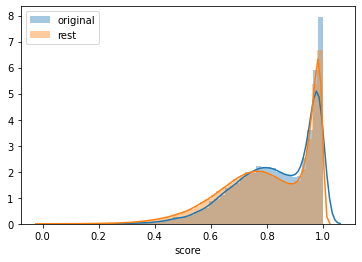

In [15]:
sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7f42fd1e94f0&gt;

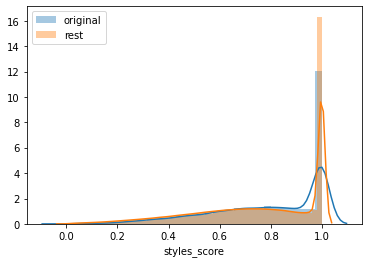

In [16]:
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["styles_score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7f42fd746160&gt;

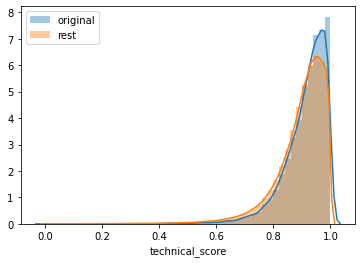

In [17]:
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["technical_score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7f42fd484f40&gt;

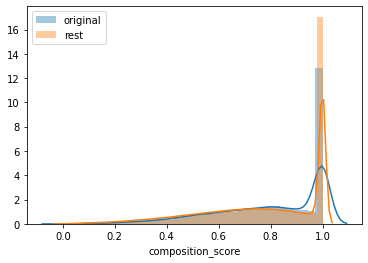

In [18]:
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["composition_score"], label="rest")
plt.legend()

In [19]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [20]:
def violin_distortion(distortion:str, score:str):
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["parameter"] == "original", "change"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

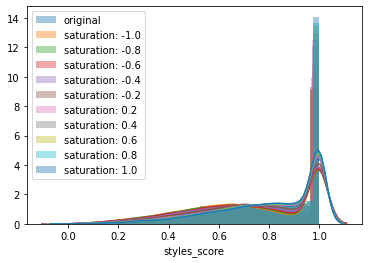

In [70]:
histogram_distortion("brightness", "styles_score")

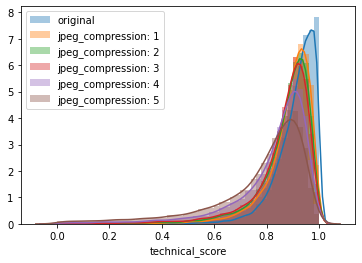

In [22]:
histogram_distortion("jpeg_compression", "technical_score")

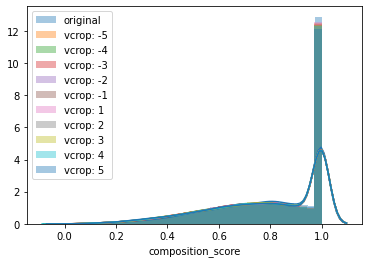

In [23]:
histogram_distortion("vcrop", "composition_score")

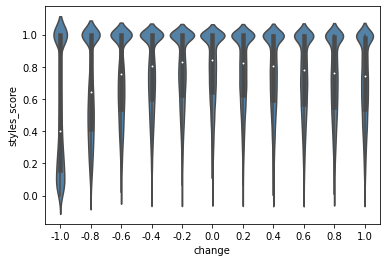

In [73]:
violin_distortion("contrast", "styles_score")

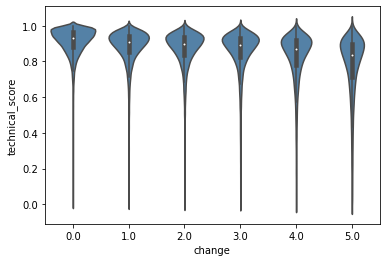

In [25]:
violin_distortion("jpeg_compression", "technical_score")

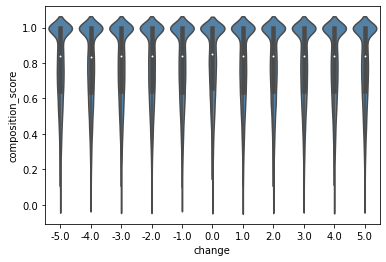

In [26]:
violin_distortion("hcrop", "composition_score")

In [51]:
avg_scores = df[["parameter","change", "score", "styles_score", "technical_score", "composition_score"]].groupby(["parameter", "change"]).mean().reset_index()
avg_scores.to_csv("analysis/SSMTIA/avg_scores.csv", index=False)
avg_scores

,parameter,change,score,styles_score,technical_score,composition_score
0,brightness,-1.0,0.795224,0.706850,0.906702,0.772120
1,brightness,-0.8,0.804422,0.724355,0.908450,0.780460
2,brightness,-0.6,0.813977,0.743345,0.909940,0.788645
3,brightness,-0.4,0.822383,0.761136,0.910970,0.795044
4,brightness,-0.2,0.829448,0.776973,0.911668,0.799704
...,...,...,...,...,...,...
178,vibrance,20.0,0.831795,0.786358,0.911057,0.797969
179,vibrance,40.0,0.832192,0.787884,0.910788,0.797903
180,vibrance,60.0,0.832591,0.789363,0.910521,0.797889
181,vibrance,80.0,0.832835,0.790409,0.910306,0.797791


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f42ef23b370&gt;

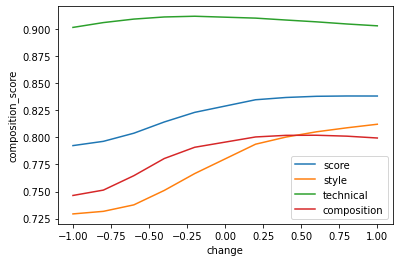

In [69]:
parameter = "saturation"
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="score", label="score")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="styles_score", label="style")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="technical_score", label="technical")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="composition_score", label="composition")

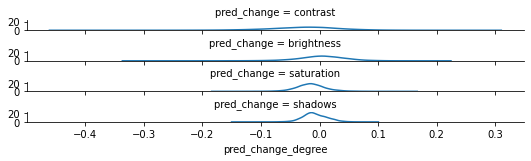

In [24]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

fg = sns.FacetGrid(df[(df["parameter"] == "saturation") & (df["change"] == 1.0)], row="pred_change", aspect=15, height=.5)
fg.map(sns.kdeplot, "pred_change_degree")

#fg.map(label, "pred_change")

#fg.set_titles("")
#fg.set(yticks=[])
#fg.despine(bottom=True, left=True)

In [39]:
def calculate_spearman(distortion: str, polarity: str, img_names=df["img"].unique()):
    corr_l = []
    p_l = []
    original_df = df[df["parameter"] == "original"]
    if distortion in parameter_range:
        original_df["change"] = parameter_range[distortion]["default"]

    parameter_df = df[df["parameter"] == distortion]
    corr_df = pd.concat([parameter_df, original_df])[["img", "parameter", "change", "score"]]

    for i, f in enumerate(img_names):
        if i % 1000 == 0:
            print(i)
        corr_df_img = corr_df[corr_df["img"] == f]

        if distortion in parameter_range:
            default = parameter_range[distortion]["default"]
        else:
            default = 0

        if polarity == "pos":
            corr_df_img = corr_df_img[corr_df_img["change"] >= default]
        else:
            corr_df_img = corr_df_img[corr_df_img["change"] <= default]

        corr_df_img["change"] = corr_df_img["change"].apply(lambda x: abs((x) - (default)))

        c, p = stats.spearmanr(corr_df_img["score"], corr_df_img["change"])
        if math.isnan(c) or math.isnan(p):
            continue
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l) / len(corr_l), sum(p_l) / len(p_l)

In [41]:
calculate_spearman(distortion="brightness", polarity="neg")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


(-0.2627681052027188, 0.20042878119471313)